In [1]:
#PCA: Principal Compenent Analysis

#Feature Selection is selecting which variables to use. Kind of backward elimination or forward selection in multiple
# linear regression

#Feature Extraction is deriving new information from the existing features
# PCA: one of the ways for feature reduction


In [2]:
#PCA is unsupervised linear transformation technique. Used in feature extraction and EDA.
#Reduces dimensionality of data. 

In [3]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [4]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [6]:
# 1) Statndardizing the values
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
# 2) Getting the eigenvalues and eigenvectors of the co variance matrix

import numpy as np

covMat = np.cov(X_train_std.T)
eigenVals, eigenVecs = np.linalg.eig(covMat)
print(eigenVals)

[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


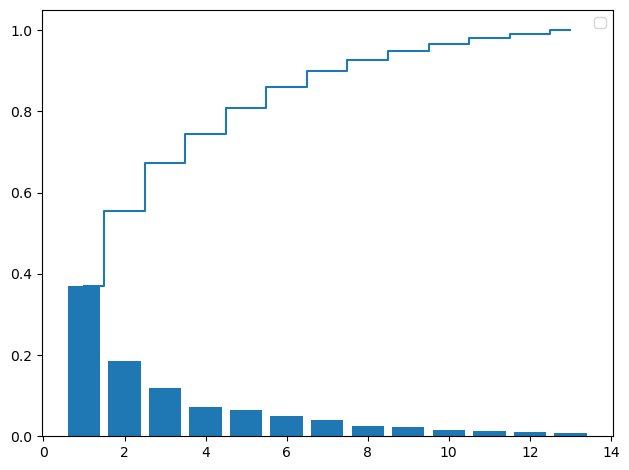

In [13]:
#Now, we need to select the principal components, ie eigen vectors, that give the most information, ie variance.
# We want the top n eigen vectors based on their eigen values
# Variance explained ratios: eigenvalue/sum of all eigenvalues

import matplotlib.pyplot as plt

totEigenVal = sum(eigenVals)
var_exp = [(i / totEigenVal) for i in sorted(eigenVals, reverse=True)]
cumVarExp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, align = 'center')
plt.step(range(1,14), cumVarExp, where = 'mid')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [28]:
# Now, sort the eigenvalue and eigenvector pairs

eigenPairs = [(np.abs(eigenVals[i]), eigenVecs[:,i])
             for i in range(len(eigenVals))]

#the linalg.eig function is a bit weird. to get the first eigen vector, u need the first element of every sublist. for
# the second eigen vector, u need the second element of every sublist

eigenPairs.sort(key=lambda k: k[0], reverse = True)

In [32]:
#Selecting the first 2 eigenvectors, corresponding to the largest eigenvalue. This explains 60% of the variance, ie
# (eigenvalue1 + eigenvalue2)/sum(eigenvalue) = 0.6

# We make a nxk matrix from the eigenvectors. Here, k is the number of eigenvalues chosen, which in this case is 2

firstVec = eigenPairs[0][1]
secondVec = eigenPairs[1][1]

w = np.c_[firstVec, secondVec]

w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [48]:
# Dot product the training dataset with the vector matrix

X_train_pca = X_train_std.dot(w)

# X_train_std has 124 rows and 13 columns
# w has 13 rows and 2 columns 
# X_train_pca is a 123 rows and 2 columns 

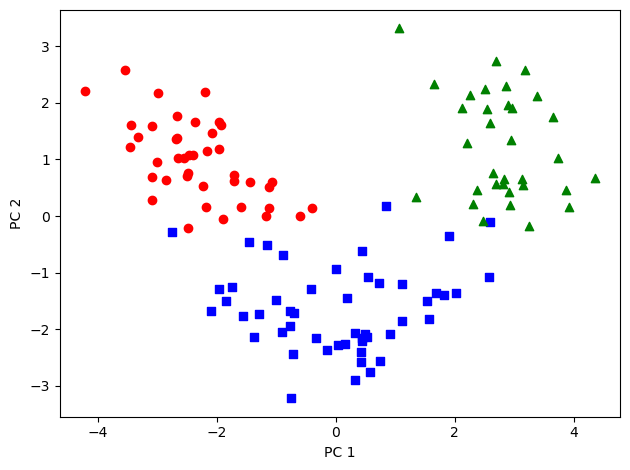

In [49]:
# Visualizing the X_train_pca

colors = ['r', 'b', 'g']

markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
               X_train_pca[y_train == l, 1],
               c=c, marker=m)
    

    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()

In [52]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

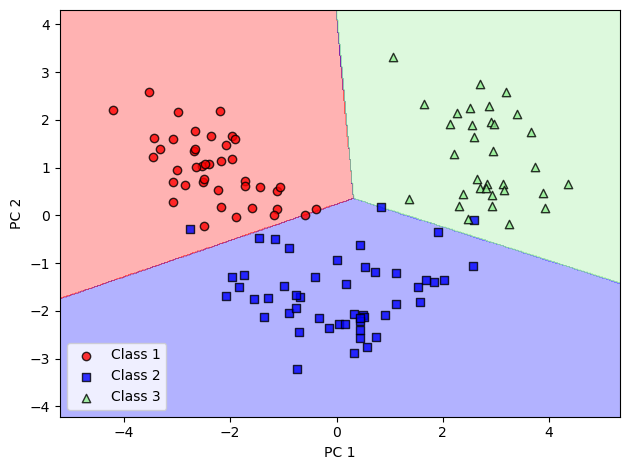

In [55]:
#PCA in sciki

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #Will select only 2 eigen values

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# Dimension reduction using sckikit
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()



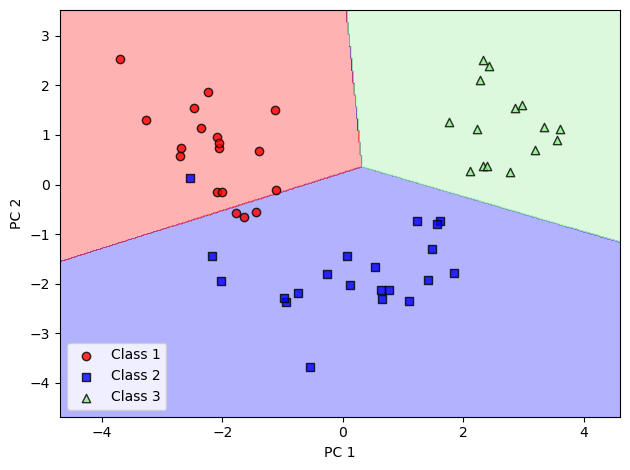

In [56]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()


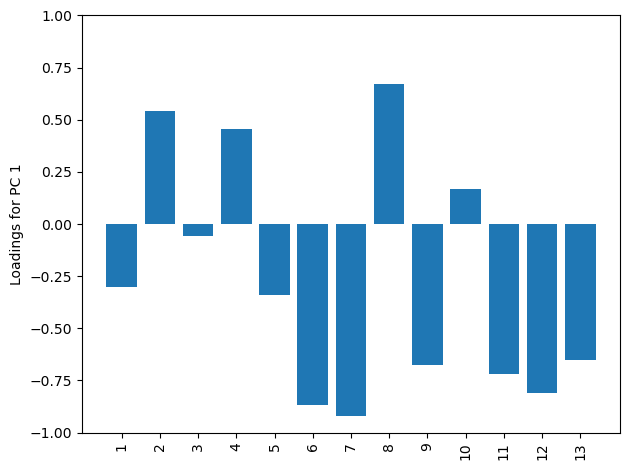

In [59]:
# Assessing Feature combinations:
# How much do the original features contribute to principal components?
# We asses this by loadings

# factor loadings: scaling the eigenvectors by the square root of the eigenvalues

loadings = eigenVecs * np.sqrt(eigenVals)

fig, ax = plt.subplots()

ax.bar(range(13), loadings[:, 0], align = 'center')
ax.set_ylabel('Loadings for PC 1')

ax.set_xticks(range(13))

ax.set_xticklabels(df_wine.columns[1:], rotation = 90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()


In [62]:
#Obtaining loadings from the scikit learn

sklearnLoadings = pca.components_.T * np.sqrt(pca.explained_variance_)

<BarContainer object of 13 artists>

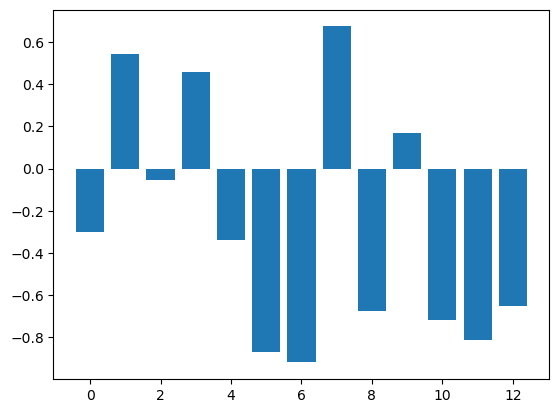

In [64]:
fig, ax = plt.subplots()

ax.bar(range(sklearnLoadings.shape[0]), sklearnLoadings[:, 0], align = 'center')

In [ ]:
#LDA:Linear Discriminant Analysis

# Another approach for feature extraction. Aims to find the feature subspace that optimizes class separability

#LDA Steps
'''
1) Standardize the d-dimensional dataset (d is the number of features, ie independent columns)
2) compute d-dimensional mean vector
3) Construct between-class scatter matrix Sb, within-class scatter matrix Sx
4) Get eigenvectors and eigenvalues of Sw^(-1)Sb
5) Sort eigenvalues by decreaing order
6) Chose k eigen vectors corresponding to k largest eigen values
7) Construct the dxk dimensional matrix (w), where k is ur eigenvectors
8) Project examples onto the new feature subspace using transformation matrix w




'''